In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

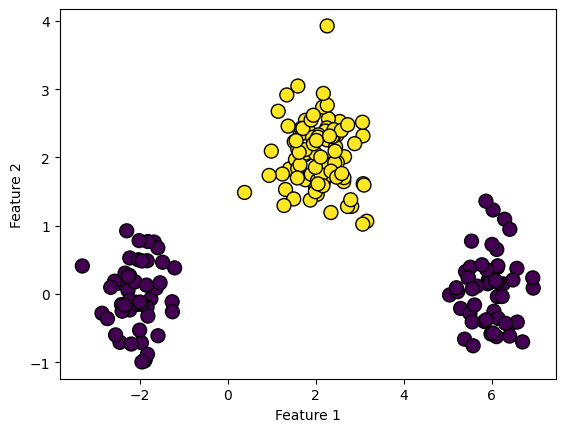

In [73]:
#הדגמת Relu

# יצירת נתונים מדומים שמציבים אתגר ל- ReLU
np.random.seed(42)

# יצירת שתי קבוצות - אחת בקו ישר ואחת מתפזרת (לא לינארית)
class_01 = np.random.randn(50, 2) * 0.5 + np.array([-2, 0])
class_02 = np.random.randn(50, 2) * 0.5 + np.array([6, 0])
class_1 = np.random.randn(100, 2) * 0.5 + np.array([2, 2])

# שילוב הקבוצות ויצירת תוויות
X_mock = np.vstack((class_01,class_02, class_1))
y_mock = np.array   ([0] * 100 +       [1] * 100)

# הצגת הנתונים
plt.scatter(X_mock[:, 0], X_mock[:, 1], c=y_mock, edgecolor='k', s=100)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [ ]:
X_tensor

In [74]:
#1
class Model1(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(2,32)
    self.relu1 = nn.ReLU ()
    self.fc2 = nn.Linear (32,16)
    self.relu2 = nn.ReLU ()
    self.fc3 = nn.Linear (16,8)
    self.relu3 = nn.ReLU ()
    self.fc4 = nn.Linear (8,1)

  def forward(self,x):
    x = self.fc1(x)
    x = self.relu1(x)
    x = self.fc2(x)
    x =self.relu2(x)
    x = self.fc3(x)
    x = self.relu3(x)
    x= self.fc4(x)
    x = torch.sigmoid(x)
    return x


In [75]:
#make tensors
X_tensor = torch.tensor(X_mock , dtype= torch.float32)
y_tensor= torch.tensor(y_mock, dtype= torch.float32).view(-1,1)

In [76]:
#2
model = Model1()

In [77]:
#3
criterion = nn.BCELoss()
#4
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [78]:
#5
epochs =1000
model.train()
for epoch in range(epochs):
  optimizer.zero_grad()

  #חיזוי
  outputs = model (X_tensor)
  loss = criterion(outputs, y_tensor) #עלות

  #תיקון bwd
  loss.backward() #חישוב הנגזרות
  optimizer.step() #תיקון משקלים לפי נגזרות

  if epoch%100 ==0:
    print(f"epoch :{epoch} Loss: {loss.item()}")

epoch :0 Loss: 0.6718700528144836
epoch :100 Loss: 0.5778504610061646
epoch :200 Loss: 0.46336281299591064
epoch :300 Loss: 0.3606937825679779
epoch :400 Loss: 0.28871095180511475
epoch :500 Loss: 0.22985000908374786
epoch :600 Loss: 0.16817671060562134
epoch :700 Loss: 0.10413404554128647
epoch :800 Loss: 0.058671072125434875
epoch :900 Loss: 0.035655733197927475


In [80]:
#6 eval
model.eval() # מצב הערכה
with torch.no_grad(): # לא לזכור ולא לעדכן כלום
  predictions = torch.sigmoid(model(X_tensor)) #הערכה על נתוני מבחן
  predicted = (predictions >0.5).float() # 1 כל מה שמעל 0.5 הוא אמת
  accuracy = (predicted ==y_tensor).float().mean().item()
  print (f"Accuracy: {accuracy}")

Accuracy: 0.5


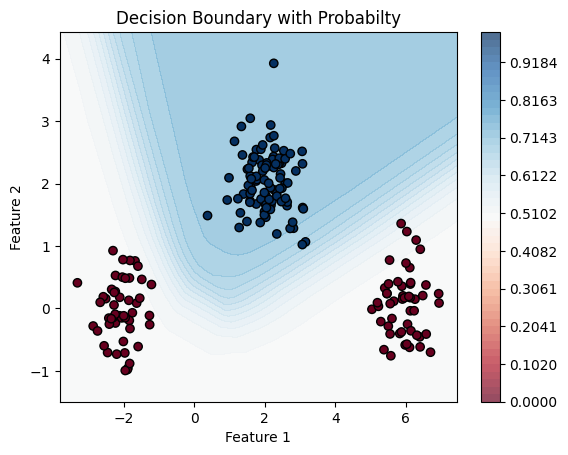

In [79]:
%run PlotBoudary.ipynb

plot_boundary (X_tensor, y_tensor,model)

In [37]:
#Relu
nums = [-2,-1,0,1,2]
relu_nums =[]
for num in nums:
  relu_num =max(0,num)
  relu_nums.append(relu_num)
print(relu_nums)

[0, 0, 0, 1, 2]
